# Neural Networks

## XNOR

In [1]:
import numpy as np
from si.data import Dataset

X = np.array([[0,0], 
              [0,1], 
              [1,0], 
              [1,1]])

y = np.array([[1], 
              [0], 
              [0], 
              [1]])

dataset = Dataset(X,y,['X1','X2'],'X1 XNOR X2')

In [2]:
dataset.toDataframe()

,X1,X2,X1 XNOR X2
0,0,0,1
1,0,1,0
2,1,0,0
3,1,1,1


In [3]:
from si.supervised.nn import NN, Dense, Sigmoid, Tanh, SGD
from si.util import multiclass_accuracy


In [4]:
# layer1 weights from the class presentation
w1 = np.array([[20,-20],[20,-20]])
b1 = np.array([[-30, 10]])
l1 = Dense(2, 2)
l1.set_weights(w1,b1)

In [5]:
# layer2 weights from the class presentation
w2 = np.array([[20],[20]])
b2 = np.array([[-10]])
l2 = Dense(2, 1)
l2.set_weights(w2,b2)

In [6]:
# Build the NN
nn = NN()
nn.add(l1)
nn.add(Sigmoid())
nn.add(l2)
nn.add(Sigmoid())
# sets the model as fitted
nn.is_fitted = True
print(nn)

Dense (2, 2)
Sigmoid
Dense (2, 1)
Sigmoid


In [7]:
nn.predict(dataset.X)

array([[0.45133217],
       [0.44866737],
       [0.45786588],
       [0.45522207]])

In [8]:
nn.cost(dataset.X,dataset.y)

0.2521907388873685

## Train the model using backpropagation

In [9]:
optimizer = SGD(learning_rate=0.1)

nn2 = NN(epochs=2000, optimizer=optimizer, verbose=False, loss='MSE')
nn2.add(Dense(2, 2))
nn2.add(Tanh())
nn2.add(Dense(2, 1))
nn2.add(Tanh())

print(nn2)

Dense (2, 2)
Tanh
Dense (2, 1)
Tanh


In [10]:
nn2.fit(dataset)

In [11]:
np.round(nn2.predict(X))

array([[1.],
       [0.],
       [0.],
       [1.]])

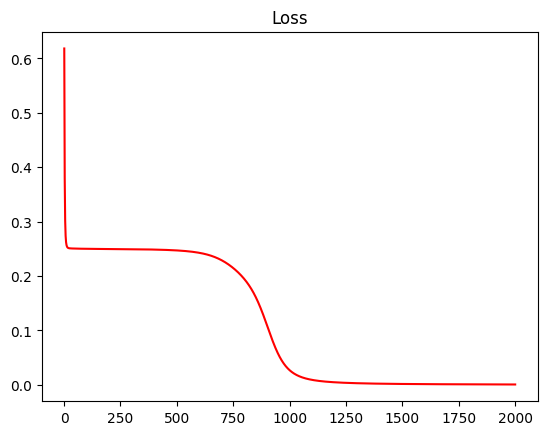

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(nn2.history.keys()), [x[0] for x in nn2.history.values()], '-', color='red')
plt.title('Loss')
plt.show()

In [13]:
np.round(nn2.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [14]:
nn2.cost(dataset.X,dataset.y)

0.0007612898130987613